In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math as mt
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [183]:
data=pd.read_csv('term-deposit-marketing-2020.csv')

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [185]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


# Data Preprocessing

In [186]:
#education bilgisi unknown olan kullanıcıların education bilgisi meslek çeşidine göre en sık görünen eğitim durumuna eşitlenmesi

In [187]:
job_education=data.groupby('job')['education'].value_counts().unstack()

In [213]:
job_education

education,primary,secondary,tertiary,unknown
job,,,,
admin,202,3723,410,148
blue-collar,3673,5144,127,439
entrepreneur,176,507,648,74
housemaid,555,345,147,40
management,273,1037,6667,189
retired,485,664,229,59
self-employed,129,552,702,31
services,336,3269,170,135
student,18,282,150,74


In [188]:
def func(x):
    if x.education=='unknown':
        return(job_education.loc[x.job].idxmax())
    else:
        return(x.education)

In [189]:
data.education=data[['job','education']].apply(func,axis=1)

In [190]:
(data.education=='unknown').sum() 
#104 kullanıcının education bilgisi unknown. bunları data setinden atalım. hiyerarşik şekilde dummy değişken atancak

104

In [191]:
data=data[data.education!='unknown']

In [192]:
#eğitim bilgisi hiyerarşik bir data olduğu için eğitim düzeyine göre yükselen etiketleme yapalım.

def edu(x):
    if x=='tertiary':
        return(3)
    elif x=='secondary':
        return(2)
    elif x=='primary':
        return(1)
    
data.education=data.education.map(edu)

In [193]:
def y_etiket(x):
    if x=='no':
        return(0)
    else:
        return(1)

data.y=data.y.map(y_etiket)

In [194]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,2,no,1506,yes,no,unknown,5,may,92,1,0
5,35,management,married,3,no,231,yes,no,unknown,5,may,139,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,3,no,395,no,no,cellular,3,jun,107,1,0
39996,30,management,single,3,no,3340,no,no,cellular,3,jun,238,3,1
39997,54,admin,divorced,2,no,200,no,no,cellular,3,jun,170,1,1
39998,34,management,married,3,no,1047,no,no,cellular,3,jun,342,1,0


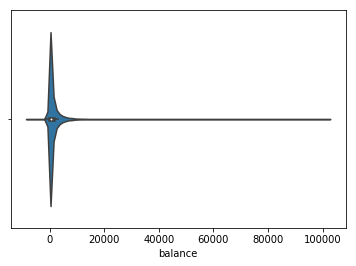

In [195]:
sns.violinplot(x="balance",data=data,orient="h")

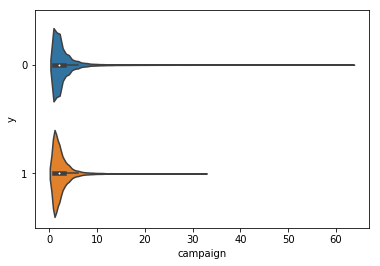

In [196]:
sns.violinplot(x="campaign",y='y',data=data,orient="h")

In [197]:
#ayın günlerini 3 kısıma ayırdık. ilk 10 günlük 

def gun(x):
    if x<=10:
        return(3)
    elif x<=20:
        return(2)
    else:
        return(1)

data['day_clas']=data.day.map(gun)

In [198]:
#ayın günlerini 3 kısıma ayırdık.

def gun(x):
    if x<=10:
        return(3)
    elif x<=20:
        return(2)
    else:
        return(1)

data['day_clas']=data.day.map(gun)

In [214]:
(2887)/(2887+37009)

0.07236314417485462

In [206]:
data.y.value_counts()

0    37009
1     2887
Name: y, dtype: int64

In [207]:
#1 ile etiketli datalar 0 etiketli datalara göre çok azdır. bu durum kurulacak olan modelde bias'a neden olacağı
#için 1 etiketli veri sayısı kadar 0 etiketli veriyi rassal bir şekilde seçtik.
#böylelikle nihai veri setimizde etiket sınıflarının oranı %50-%50 şekilde oldu.

data_1=data[data.y==1]
np.random.seed(42)
ix=np.random.choice(data[data.y==0].index, len(data_1),replace=False)
data_0=data.loc[ix]

In [208]:
df=pd.concat([data_0,data_1])
y=df.y
y.value_counts()

1    2887
0    2887
Name: y, dtype: int64

In [209]:
df.drop(['month','day'],axis=1,inplace=True)

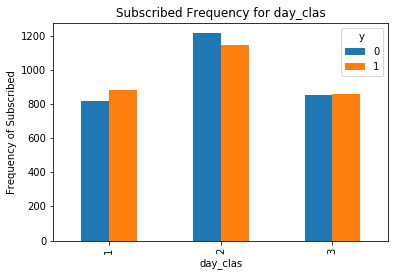

In [210]:
%matplotlib inline
pd.crosstab(df.day_clas,df.y).plot(kind='bar')
plt.title('Subscribed Frequency for day_clas')
plt.xlabel('day_clas')
plt.ylabel('Frequency of Subscribed')
plt.show()

In [211]:
#aylara göre yaz ve kış mevsimi olarak etiketlendi
def mevsim(x):
    if x in list(['sep','nov','dec','jan','feb','mar']):
        return('yaz')
    else:
        return('kış')
data['mevsim']=data.month.map(mevsim)

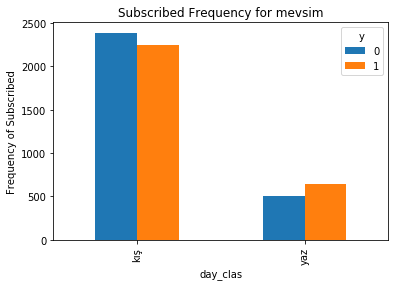

In [212]:
%matplotlib inline
pd.crosstab(df.mevsim,df.y).plot(kind='bar')
plt.title('Subscribed Frequency for mevsim')
plt.xlabel('day_clas')
plt.ylabel('Frequency of Subscribed')
plt.show()

In [150]:
X=df.drop('y',axis=1)

In [151]:
y=df.y

In [152]:
X_prepared=pd.get_dummies(X,drop_first=True)

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logreg=LogisticRegression()

In [154]:
logreg.fit(X_prepared,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
cv_score=cross_val_score(logreg,X_prepared,y,cv=5,scoring='accuracy')
cv_score

array([0.78701299, 0.85887446, 0.74025974, 0.70649351, 0.79809359])

In [156]:
np.mean(cv_score)

0.7781468560324714

In [157]:

scores = cross_val_score(logreg, X_prepared, y, cv=5, scoring='f1_macro')
np.mean(scores)

0.7758281586826894

In [158]:
np.mean(cross_val_score(logreg, X_prepared, y, cv=5, scoring='precision'))


0.8169636788251221

In [159]:
np.mean(cross_val_score(logreg, X_prepared, y, cv=5, scoring='recall'))

0.715364641115902

In [160]:
original_variables=list(X_prepared.columns)

zipped=list(zip(original_variables,logreg.coef_[0]))
coefs=[list(x) for x in zipped]
df1=pd.DataFrame(coefs,columns=['Variable','Coefficient'])
df1['exp']=df1.Coefficient.map(lambda x:mt.e**x)
df1.sort_values(by='Coefficient',ascending=False)

,Variable,Coefficient,exp
24,mevsim_yaz,0.357871,1.430281
10,job_retired,0.246955,1.280122
22,contact_telephone,0.156849,1.169819
9,job_management,0.120645,1.128224
1,education,0.098846,1.103896
13,job_student,0.097868,1.102817
18,marital_single,0.006630,1.006652
3,duration,0.005935,1.005953
16,job_unknown,0.003359,1.003364
2,balance,0.000010,1.000010


Yukarıdaki tabloyu yorumlayacak olursak, logistic regresyon modeline göre mevsimin yaz olması teklifi kabul etme  olasılığını %42 oranında. arttırmaktadır. Bundan sonra müşterinin mesleğinin emekli olması teklifin kabul edilme olasılığını ortalama %28 arttırmaktadır. 

bilinmeyen contact(contact_unknown) iletişim şekli olan tekliflerin kabul edilme olasılığı %60 civarında azalmaktadır. buna benzer olarak "housing_yes" olması yani müşterinin ev sahibi olması teklifin kabul edilme olasılığını %58 oranında düşürmektedir. 

# desicion tree

In [161]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": np.arange(1, 20),
              "max_features": np.arange(1, 40),
              "min_samples_leaf": np.arange(1, 40),
              "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()
np.random.seed(42)
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X_prepared, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [173]:
best_tree=tree_cv.best_estimator_

In [162]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 3, 'max_features': 23, 'max_depth': 1, 'criterion': 'gini'}
Best score is 0.7918248591385506


In [175]:
feature_cols=X_prepared.columns

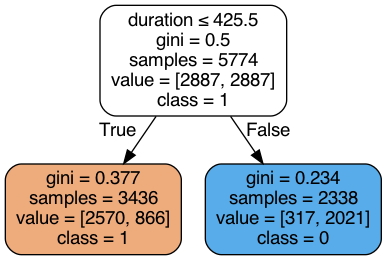

In [177]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(best_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','0'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


#desicion tree yöntemine göre en önemli ve tek parametre müşteri ile konuşma süresidir. müşteri ile konuşma süresi 
#arttığı zaman müşerinin teklifi kabul etme  ihtimali de artmaktadır.

# Random Forest Regression

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
r_forest=RandomForestClassifier()

In [165]:
param_dist = {"n_estimators": np.arange(100, 500,10),
              "max_depth": np.arange(1, 20),
              "max_features": np.arange(1, 40),
              "min_samples_leaf": np.arange(1, 40),
              "criterion": ["gini", "entropy"]}

In [166]:
np.random.seed(42)
randomforest_cv = RandomizedSearchCV(r_forest, param_dist, cv=5)
randomforest_cv.fit(X_prepared, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [167]:
print("Tuned Decision Tree Parameters: {}".format(randomforest_cv.best_params_))
print("Best score is {}".format(randomforest_cv.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 140, 'min_samples_leaf': 36, 'max_features': 25, 'max_depth': 18, 'criterion': 'entropy'}
Best score is 0.7274128759744011


# K fold With NN

In [85]:
data=pd.read_csv('term-deposit-marketing-2020.csv')
job_education=data.groupby('job')['education'].value_counts().unstack()
def func(x):
    if x.education=='unknown':
        return(job_education.loc[x.job].idxmax())
    else:
        return(x.education)
data.education=data[['job','education']].apply(func,axis=1)
data=data[data.education!='unknown']
def edu(x):
    if x=='tertiary':
        return(3)
    elif x=='secondary':
        return(2)
    elif x=='primary':
        return(1)
    
data.education=data.education.map(edu)
def y_etiket(x):
    if x=='no':
        return(0)
    else:
        return(1)

def gun(x):
    if x<=10:
        return(3)
    elif x<=20:
        return(2)
    else:
        return(1)

data['day_clas']=data.day.map(gun)

def mevsim(x):
    if x in list(['sep','nov','dec','jan','feb','mar']):
        return('yaz')
    else:
        return('kış')
data['mevsim']=data.month.map(mevsim)

data.y=data.y.map(y_etiket)

data_1=data[data.y==1]
np.random.seed(42)
ix=np.random.choice(data[data.y==0].index, len(data_1),replace=False)
data_0=data.loc[ix]

df=pd.concat([data_0,data_1])

df.drop(['month','day'],axis=1,inplace=True)
X=df.drop('y',axis=1)
y=df.y
X_prepared=pd.get_dummies(X,drop_first=True)

In [108]:
from sklearn.model_selection import KFold
from keras import models
from tensorflow.keras.layers import Dense, Dropout
from keras import layers
#Because you’ll need to instantiate the same model multiple times, you use a function to construct it.
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(28, activation='sigmoid',input_shape=(X_prepared.shape[1],)))
    model.add(layers.Dense(20, activation='tanh'))
    model.add(layers.Dense(15, activation='sigmoid'))
    model.add(layers.Dense(10, activation='sigmoid'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [109]:
num_epochs = 80
all_scores = []
np.random.seed(41)
kf=KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(X_prepared,y):
    kf_data_train=X_prepared.iloc[train_index]
    kf_data_test=X_prepared.iloc[test_index]
    kf_target_train=y.iloc[train_index]
    kf_target_test=y.iloc[test_index]
    model = None
    model = build_model()
    model.fit(kf_data_train, kf_target_train, 
              epochs=num_epochs, batch_size=35)
    #verbose 0 silent mode
    val_m, val_accuracy = model.evaluate(kf_data_test, kf_target_test, verbose=0)
    all_scores.append(val_accuracy)

Epoch 1/80
4619/4619 [==============================] - 0s 83us/step - loss: 0.6897 - accuracy: 0.5406
Epoch 2/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.6323 - accuracy: 0.7199
Epoch 3/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.5355 - accuracy: 0.7573
Epoch 4/80
4619/4619 [==============================] - 0s 43us/step - loss: 0.5048 - accuracy: 0.7621
Epoch 5/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.4946 - accuracy: 0.7744
Epoch 6/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.4992 - accuracy: 0.7670
Epoch 7/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.4854 - accuracy: 0.7811
Epoch 8/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.4890 - accuracy: 0.7829
Epoch 9/80
4619/4619 [==============================] - 0s 41us/step - loss: 0.4788 - accuracy: 0.7844
Epoch 10/80
4619/4619 [==============================] - 0s 50us/step - l

4619/4619 [==============================] - 0s 41us/step - loss: 0.4080 - accuracy: 0.8084
Epoch 80/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.4240 - accuracy: 0.8065
Epoch 1/80
4619/4619 [==============================] - 0s 91us/step - loss: 0.7576 - accuracy: 0.5042
Epoch 2/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.6811 - accuracy: 0.5285
Epoch 3/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.6028 - accuracy: 0.7428
Epoch 4/80
4619/4619 [==============================] - 0s 37us/step - loss: 0.5267 - accuracy: 0.7835
Epoch 5/80
4619/4619 [==============================] - 0s 42us/step - loss: 0.5151 - accuracy: 0.7735
Epoch 6/80
4619/4619 [==============================] - 0s 42us/step - loss: 0.4945 - accuracy: 0.7831
Epoch 7/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.4852 - accuracy: 0.7878
Epoch 8/80
4619/4619 [==============================] - 0s 41us/step - loss: 0.4868

Epoch 78/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.3993 - accuracy: 0.8151
Epoch 79/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.4030 - accuracy: 0.8088
Epoch 80/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.4014 - accuracy: 0.8173
Epoch 1/80
4619/4619 [==============================] - 0s 87us/step - loss: 0.7340 - accuracy: 0.5036
Epoch 2/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.6623 - accuracy: 0.6352
Epoch 3/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.5508 - accuracy: 0.7725
Epoch 4/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.5033 - accuracy: 0.7807
Epoch 5/80
4619/4619 [==============================] - 0s 39us/step - loss: 0.4925 - accuracy: 0.7764
Epoch 6/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.4831 - accuracy: 0.7887
Epoch 7/80
4619/4619 [==============================] - 0s 39us/step -

4619/4619 [==============================] - 0s 41us/step - loss: 0.4073 - accuracy: 0.8103
Epoch 77/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.4123 - accuracy: 0.8149
Epoch 78/80
4619/4619 [==============================] - 0s 41us/step - loss: 0.4076 - accuracy: 0.8114
Epoch 79/80
4619/4619 [==============================] - 0s 41us/step - loss: 0.4034 - accuracy: 0.8136
Epoch 80/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.4094 - accuracy: 0.8138
Epoch 1/80
4619/4619 [==============================] - 0s 91us/step - loss: 0.7133 - accuracy: 0.5137
Epoch 2/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.6218 - accuracy: 0.7435
Epoch 3/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.5376 - accuracy: 0.7692
Epoch 4/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.4994 - accuracy: 0.7835
Epoch 5/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.4

Epoch 75/80
4619/4619 [==============================] - 0s 40us/step - loss: 0.4159 - accuracy: 0.8034
Epoch 76/80
4619/4619 [==============================] - 0s 41us/step - loss: 0.4264 - accuracy: 0.7954
Epoch 77/80
4619/4619 [==============================] - 0s 41us/step - loss: 0.4124 - accuracy: 0.8090
Epoch 78/80
4619/4619 [==============================] - 0s 41us/step - loss: 0.4095 - accuracy: 0.8065
Epoch 79/80
4619/4619 [==============================] - 0s 41us/step - loss: 0.4109 - accuracy: 0.8084
Epoch 80/80
4619/4619 [==============================] - 0s 41us/step - loss: 0.4114 - accuracy: 0.8080
Epoch 1/80
4620/4620 [==============================] - 0s 88us/step - loss: 0.6693 - accuracy: 0.6108
Epoch 2/80
4620/4620 [==============================] - 0s 41us/step - loss: 0.5498 - accuracy: 0.7675
Epoch 3/80
4620/4620 [==============================] - 0s 41us/step - loss: 0.4937 - accuracy: 0.7844
Epoch 4/80
4620/4620 [==============================] - 0s 42us/ste

4620/4620 [==============================] - 0s 44us/step - loss: 0.4099 - accuracy: 0.8104
Epoch 74/80
4620/4620 [==============================] - 0s 45us/step - loss: 0.4200 - accuracy: 0.8084
Epoch 75/80
4620/4620 [==============================] - 0s 44us/step - loss: 0.4094 - accuracy: 0.8162
Epoch 76/80
4620/4620 [==============================] - 0s 44us/step - loss: 0.4258 - accuracy: 0.8009
Epoch 77/80
4620/4620 [==============================] - 0s 46us/step - loss: 0.4087 - accuracy: 0.8169
Epoch 78/80
4620/4620 [==============================] - 0s 43us/step - loss: 0.4158 - accuracy: 0.8156
Epoch 79/80
4620/4620 [==============================] - 0s 45us/step - loss: 0.4177 - accuracy: 0.8093
Epoch 80/80
4620/4620 [==============================] - 0s 42us/step - loss: 0.4153 - accuracy: 0.8080


In [110]:
model.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_310 (Dense)            (None, 28)                728       
_________________________________________________________________
dense_311 (Dense)            (None, 20)                580       
_________________________________________________________________
dense_312 (Dense)            (None, 15)                315       
_________________________________________________________________
dense_313 (Dense)            (None, 10)                160       
_________________________________________________________________
dense_314 (Dense)            (None, 1)                 11        
Total params: 1,794
Trainable params: 1,794
Non-trainable params: 0
_________________________________________________________________


In [113]:
np.round(all_scores,2)

array([0.82, 0.79, 0.8 , 0.83, 0.79])

In [114]:
np.round(np.mean(all_scores),2)

0.81